The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[2023/06/12 18:18:36] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\liaomin/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\liaomin/.paddleocr/whl\\det\\ch\\ch_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_le

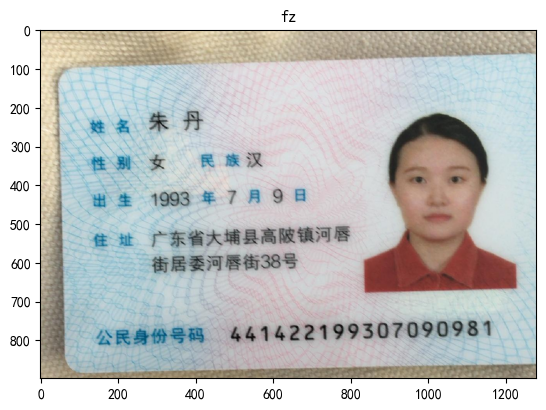

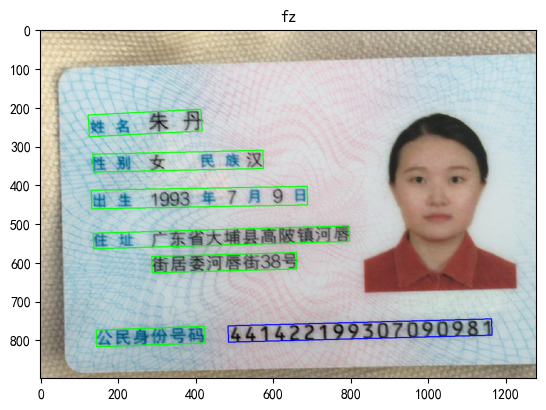

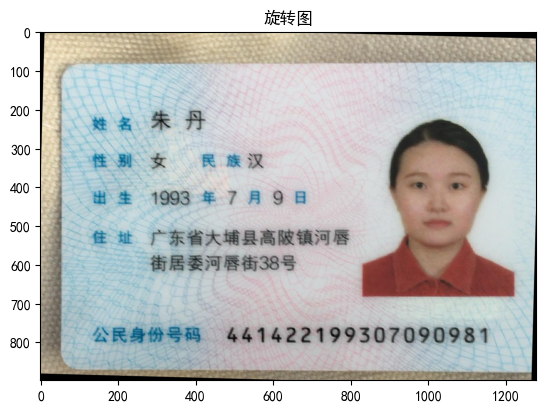

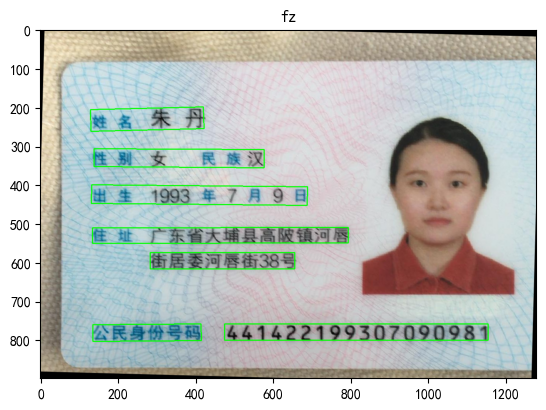

In [65]:
%load_ext autoreload
%autoreload 2
import math
import time
from myutils import common
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from paddleocr import PaddleOCR, draw_ocr

# img_fp = './00003aaaf3174f1d83a379bb88a4cf6d.png'
img_fp = './00003af195d143cd97061b6487849126.jpg'
# img_fp = './un/qzl.png'
# img_fp = './un/v2-79e22af53f23f6e8be55cf913e104103_b.jpg'

image1=cv2.imread(img_fp)
img=image1.copy()
common.show(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB),"fz",debug=True)

ocr = PaddleOCR(use_angle_cls=True, lang="ch")
# out = ocr.ocr(dst)
start_time = time.time()

result = ocr.ocr(image1, cls=True)
end_time = time.time()
time_taken = end_time - start_time

print("代码执行时间为：{} 秒".format(time_taken))
print(result)
maxH=0
noLocation=None
for idx in range(len(result)):
    res = result[idx]
    # print(res)
    for line in res:
        points = [[int(x) for x in point] for point in line[0]]
        pts = [points[0], points[1], points[2], points[3]]
        cv2.polylines(image1, [np.array(pts)], True, (0, 255, 0), 2)
        rect = cv2.minAreaRect(np.array(pts))
        width, height = rect[1]
        maxHeight=max(width, height)
        if maxHeight>maxH:
            maxH=maxHeight
            noLocation=pts
cv2.polylines(image1, [np.array(noLocation)], True, (255, 0, 0), 2)
common.show(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB),"fz",debug=True)
rotated_img,M = common.justImage(img,noLocation)
common.show(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB),"旋转图",debug=True)
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        pointsNew=common.justPoint(line[0],M);  
        line[0]=pointsNew
        cv2.polylines(rotated_img, [np.array(pointsNew)], True, (0, 255, 0), 2)
common.show(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB),"fz",debug=True)